# 2019 Guide to Flying in the Bay Area
## by Evan Chen

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os
import datetime

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
flights = pd.read_csv('flights.csv')
flights.head()

,year,month,day_of_month,day_of_week,op_unique_carrier,tail_num,op_carrier_fl_num,origin,dest,crs_dep_time,...,diverted,crs_elapsed_time,actual_elapsed_time,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2019.0,8.0,22.0,4.0,UA,N26215,1139.0,SFO,TPA,2300.0,...,0.0,305.0,347.0,279.0,2393.0,0.0,0.0,45.0,0.0,0.0
1,2019.0,8.0,22.0,4.0,UA,N496UA,1138.0,MSP,SFO,1935.0,...,0.0,251.0,235.0,206.0,1589.0,0.0,0.0,4.0,0.0,23.0
2,2019.0,8.0,22.0,4.0,UA,N214UA,1135.0,SFO,DEN,1255.0,...,0.0,154.0,155.0,118.0,967.0,NaN,NaN,NaN,NaN,NaN
3,2019.0,8.0,22.0,4.0,UA,N18223,1129.0,DFW,SFO,610.0,...,0.0,229.0,222.0,199.0,1464.0,NaN,NaN,NaN,NaN,NaN
4,2019.0,8.0,22.0,4.0,UA,N443UA,1122.0,EUG,SFO,600.0,...,0.0,94.0,94.0,68.0,451.0,0.0,43.0,0.0,0.0,0.0


In [3]:
carriers = pd.read_csv('carriers.csv')
carriers.head()

,Code,Description
0,02Q,Titan Airways
1,04Q,Tradewind Aviation
2,05Q,"Comlux Aviation, AG"
3,06Q,Master Top Linhas Aereas Ltd.
4,07Q,Flair Airlines Ltd.


In [4]:
flights = flights.merge(carriers, how='left', left_on=['op_unique_carrier'], right_on=['Code'])
# drop the duplicate column
flights.drop('Code', axis=1, inplace=True)
flights.rename(columns={'Description': 'carrier_name'}, inplace=True)
flights.head()

,year,month,day_of_month,day_of_week,op_unique_carrier,tail_num,op_carrier_fl_num,origin,dest,crs_dep_time,...,crs_elapsed_time,actual_elapsed_time,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,carrier_name
0,2019.0,8.0,22.0,4.0,UA,N26215,1139.0,SFO,TPA,2300.0,...,305.0,347.0,279.0,2393.0,0.0,0.0,45.0,0.0,0.0,United Air Lines Inc.
1,2019.0,8.0,22.0,4.0,UA,N496UA,1138.0,MSP,SFO,1935.0,...,251.0,235.0,206.0,1589.0,0.0,0.0,4.0,0.0,23.0,United Air Lines Inc.
2,2019.0,8.0,22.0,4.0,UA,N214UA,1135.0,SFO,DEN,1255.0,...,154.0,155.0,118.0,967.0,NaN,NaN,NaN,NaN,NaN,United Air Lines Inc.
3,2019.0,8.0,22.0,4.0,UA,N18223,1129.0,DFW,SFO,610.0,...,229.0,222.0,199.0,1464.0,NaN,NaN,NaN,NaN,NaN,United Air Lines Inc.
4,2019.0,8.0,22.0,4.0,UA,N443UA,1122.0,EUG,SFO,600.0,...,94.0,94.0,68.0,451.0,0.0,43.0,0.0,0.0,0.0,United Air Lines Inc.


In [5]:
airports = pd.read_csv('airports.csv')
airports.head()

,iata,airport,city,state,country,lat,long
0,00M,Thigpen,Bay Springs,MS,USA,31.953765,-89.234505
1,00R,Livingston Municipal,Livingston,TX,USA,30.685861,-95.017928
2,00V,Meadow Lake,Colorado Springs,CO,USA,38.945749,-104.569893
3,01G,Perry-Warsaw,Perry,NY,USA,42.741347,-78.052081
4,01J,Hilliard Airpark,Hilliard,FL,USA,30.688012,-81.905944


In [6]:
airports.drop(['airport', 'country'], axis=1, inplace=True)

In [7]:
origin_airports = airports.rename(columns=lambda x: 'origin_'+x)
dest_airports = airports.rename(columns=lambda x: 'dest_'+x)

In [8]:
flights = flights.merge(origin_airports, how='left', left_on=['origin'], right_on=['origin_iata'])
flights = flights.merge(dest_airports, how='left', left_on=['dest'], right_on=['dest_iata'])
# drop the duplicate columns
flights.drop(['origin_iata', 'dest_iata'], axis=1, inplace=True)

In [9]:
flights.drop(['tail_num', 'op_carrier_fl_num', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay'], axis=1, inplace=True)

In [10]:
flights['year'] = flights['year'].astype(int)
flights['month'] = flights['month'].astype(int)
flights['day_of_month'] = flights['day_of_month'].astype(int)
flights['cancellation_code'] = flights['cancellation_code'].astype('category')

In [11]:
flights['date'] = pd.to_datetime(flights['year']*10000+flights['month']*100+flights['day_of_month'], format='%Y%m%d')

In [12]:
flights['day_of_week'] = flights['date'].dt.strftime('%a')
# convert to ordered category
week_order = ['Sun', 'Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat']
ordered_week = pd.api.types.CategoricalDtype(ordered=True, categories=week_order)
flights['day_of_week'] = flights['day_of_week'].astype(ordered_week)

In [13]:
def hhmm_to_time(hhmm):
    '''Converts time data formatted as hhmm into times.'''
    try:
        if hhmm >= 2400:
            hhmm -= 2400
        hh = int(hhmm)//100
        mm = int(hhmm)%100
        return datetime.time(hh, mm)
    except:
        return pd.NaT

In [14]:
time_col = ['crs_dep_time', 'dep_time', 'crs_arr_time', 'arr_time']
for col in time_col:
    flights[col] = flights[col].apply(hhmm_to_time)

In [15]:
flights.loc[flights['dep_delay'].notnull() & flights['cancelled'] == 1., 'dep_delay'] = np.nan

In [16]:
flights.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 573699 entries, 0 to 573698
Data columns (total 32 columns):
 #   Column               Non-Null Count   Dtype         
---  ------               --------------   -----         
 0   year                 573699 non-null  int64         
 1   month                573699 non-null  int64         
 2   day_of_month         573699 non-null  int64         
 3   day_of_week          573699 non-null  category      
 4   op_unique_carrier    573699 non-null  object        
 5   origin               573699 non-null  object        
 6   dest                 573699 non-null  object        
 7   crs_dep_time         573699 non-null  object        
 8   dep_time             562185 non-null  object        
 9   dep_delay            561963 non-null  float64       
 10  taxi_out             562028 non-null  float64       
 11  taxi_in              561590 non-null  float64       
 12  crs_arr_time         573699 non-null  object        
 13  arr_time      

In [17]:
bay_area = ['SFO', 'SJC', 'OAK']
departures = flights.query('origin in @bay_area')
arrivals = flights.query('dest in @bay_area')

In [18]:
def extract_hour(time):
    '''Extracts the hour from a time.'''
    return time.hour

In [19]:
departures['crs_dep_hour'] = departures['crs_dep_time'].apply(extract_hour)
arrivals['crs_arr_hour'] = arrivals['crs_arr_time'].apply(extract_hour)

In [20]:
dep_carrier_order = departures['carrier_name'].value_counts()
ordered_dep_carrier = pd.api.types.CategoricalDtype(ordered=True, categories=dep_carrier_order.index)
departures['carrier_name'] = departures['carrier_name'].astype(ordered_dep_carrier)
arr_carrier_order = arrivals['carrier_name'].value_counts()
ordered_arr_carrier = pd.api.types.CategoricalDtype(ordered=True, categories=arr_carrier_order.index)
arrivals['carrier_name'] = arrivals['carrier_name'].astype(ordered_arr_carrier)

In [21]:
dep_bay_order = departures['origin'].value_counts()
ordered_dep_bay = pd.api.types.CategoricalDtype(ordered=True, categories=dep_bay_order.index)
departures['origin'] = departures['origin'].astype(ordered_dep_bay)
arr_bay_order = arrivals['dest'].value_counts()
ordered_arr_bay = pd.api.types.CategoricalDtype(ordered=True, categories=arr_bay_order.index)
arrivals['dest'] = arrivals['dest'].astype(ordered_arr_bay)

In [22]:
departures['dest_name'] = departures['dest']+' ('+departures['dest_city']+', '+departures['dest_state']+')'
arrivals['origin_name'] = arrivals['origin']+' ('+arrivals['origin_city']+', '+arrivals['origin_state']+')'

In [23]:
dest_order = departures['dest_name'].value_counts().nlargest(20)
# create new dataframe with only top 20 destinations
departures_top = departures[departures['dest_name'].isin(dest_order.index)]
ordered_dest = pd.api.types.CategoricalDtype(ordered=True, categories=dest_order.index)
departures_top['dest_name'] = departures_top['dest_name'].astype(ordered_dest)
origin_order = arrivals['origin_name'].value_counts().nlargest(20)
# create new dataframe with only top 20 origins
arrivals_top = arrivals[arrivals['origin_name'].isin(origin_order.index)]
ordered_origin = pd.api.types.CategoricalDtype(ordered=True, categories=origin_order.index)
arrivals_top['origin_name'] = arrivals_top['origin_name'].astype(ordered_origin)

In [24]:
def symlog_bins(df, column, log_binsize):
    '''Creates bins for a symlog distribution based on the range of values in the specified column and the specified bin size.'''
    bins = np.append(np.sort(-10**np.arange(0, np.log10(-df[column].min())+log_binsize, log_binsize)), np.append(np.array([0]), 10**np.arange(0, np.log10(df[column].max())+log_binsize, log_binsize)))
    return bins

In [25]:
def log_bins(df, column, log_binsize):
    '''Creates bins for a log distribution based on the range of values in the specified column and the specified bin size.'''
    bins = 10**np.arange(np.log10(df[column].min()), np.log10(df[column].max())+log_binsize, log_binsize)
    return bins

In [26]:
def linear_bins(df, column, binsize):
    '''Creates bins for a linear distribution based on the range of values in the specified column and the specified bin size.'''
    bins = np.arange(df[column].min(), df[column].max()+binsize, binsize)
    return bins

## Investigation Overview

This investigation uses data from the Bureau of Transportation Statistics, which tracks the on-time performance of US domestic flights. The dataset has been narrowed down to 2019 departures and arrivals at Bay Area airports, which include SFO (San Francisco International Airport), SJC (Norman Y. Mineta San Jose International Airport), and OAK (Oakland International Airport).

In this investigation, I will answer the following questions:
- Which Bay Area airport should you choose?
- What time should you fly?
- Which carrier should you choose?
- Which location outside of the Bay Area should you fly to or from?

Performance will be measured by arrival delay, cancellation rate, and diversion rate.

## Dataset Overview

The dataset consists of 286,933 departures from and 286,766 arrivals into Bay Area airports. The main performance metrics will be summarized in the following sub-slides.

The distribution of arrival delay is bimodal, with one peak around -15 minutes (early arrival) and another around 20 minutes.

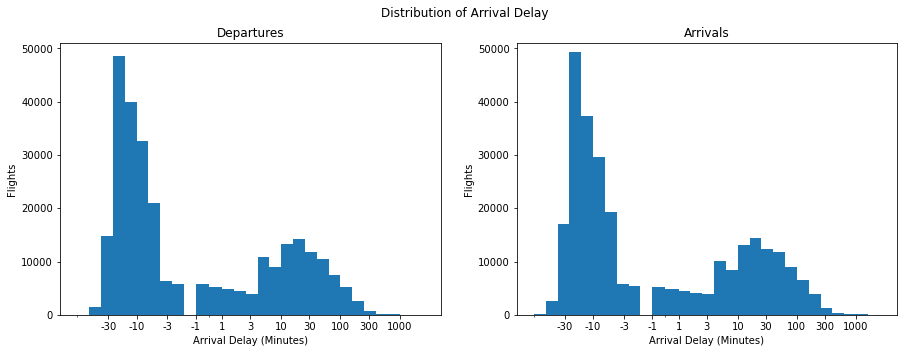

In [27]:
df_list = [departures, arrivals]
plt.figure(figsize=[15, 5])
titles = ['Departures', 'Arrivals']
log_binsize = 0.2
tick_locs = [-30, -10, -3, -1, 1, 3, 10, 30, 100, 300, 1000]
for i in range(len(df_list)):
    plt.subplot(1, 2, i+1)
    bins = symlog_bins(df_list[i], 'arr_delay', log_binsize)
    plt.hist(data=df_list[i], x='arr_delay', bins=bins)
    plt.xscale('symlog', linthresh=1, linscale=log_binsize)
    plt.xticks(tick_locs, tick_locs)
    plt.title(titles[i])
    plt.xlabel('Arrival Delay (Minutes)')
    plt.ylabel('Flights')
    plt.ylim(0, 51000)
plt.suptitle('Distribution of Arrival Delay');

The overall cancellation rate is 2.04% for departures and 2.05% for arrivals.

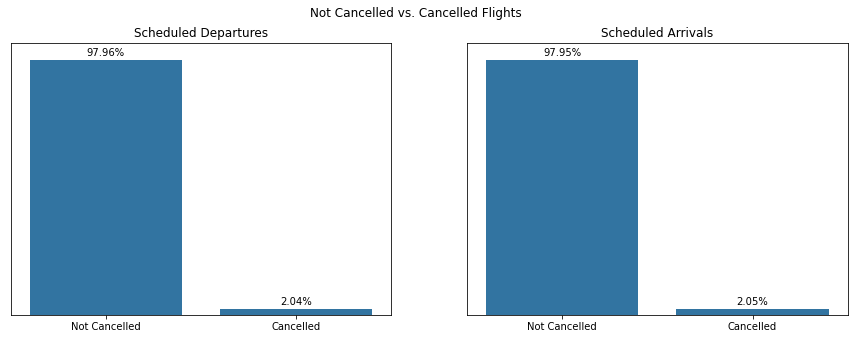

In [28]:
base_color = sb.color_palette()[0]
df_list = [departures, arrivals]
plt.figure(figsize=[15, 5])
titles = ['Scheduled Departures', 'Scheduled Arrivals']
tick_locs = [0, 1]
tick_names = ['Not Cancelled', 'Cancelled']
for i in range(len(df_list)):
    plt.subplot(1, 2, i+1)
    sb.countplot(data=df_list[i], x='cancelled', color=base_color)
    plt.title(titles[i])
    counts = df_list[i]['cancelled'].value_counts()
    locs, labels = plt.xticks()
    for loc, label in zip(locs, labels):
        count = counts[float(label.get_text())]
        count_string = '{:0.2f}%'.format(count/len(df_list[i])*100)
        plt.text(loc, count+5000, count_string, ha='center')
    plt.xticks(tick_locs, tick_names)
    plt.xlabel('')
    plt.ylabel('')
    plt.yticks([])
    plt.ylim(0, 300000)
plt.suptitle('Not Cancelled vs. Cancelled Flights');

The overall diversion rate is 0.24% for departures and 0.21% for arrivals.

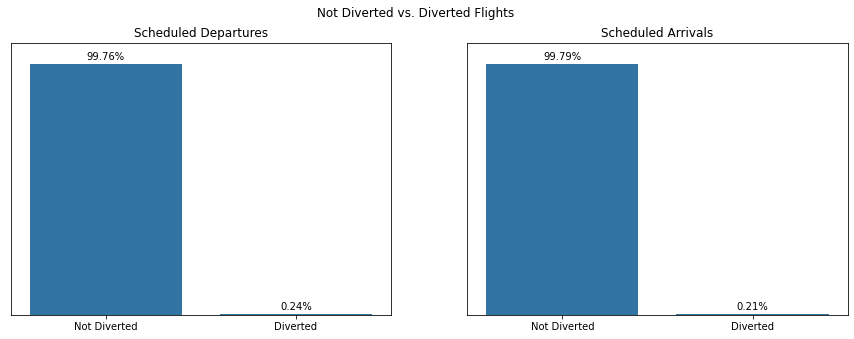

In [29]:
base_color = sb.color_palette()[0]
df_list = [departures, arrivals]
plt.figure(figsize=[15, 5])
titles = ['Scheduled Departures', 'Scheduled Arrivals']
tick_locs = [0, 1]
tick_names = ['Not Diverted', 'Diverted']
for i in range(len(df_list)):
    plt.subplot(1, 2, i+1)
    sb.countplot(data=df_list[i], x='diverted', color=base_color)
    plt.title(titles[i])
    counts = df_list[i]['diverted'].value_counts()
    locs, labels = plt.xticks()
    for loc, label in zip(locs, labels):
        count = counts[float(label.get_text())]
        count_string = '{:0.2f}%'.format(count/len(df_list[i])*100)
        plt.text(loc, count+5000, count_string, ha='center')
    plt.xticks(tick_locs, tick_names)
    plt.xlabel('')
    plt.ylabel('')
    plt.yticks([])
    plt.ylim(0, 310000)
plt.suptitle('Not Diverted vs. Diverted Flights');

## Which Bay Area airport should you choose?

SFO offers about triple the amount of departures and arrivals compared to SJC and OAK.

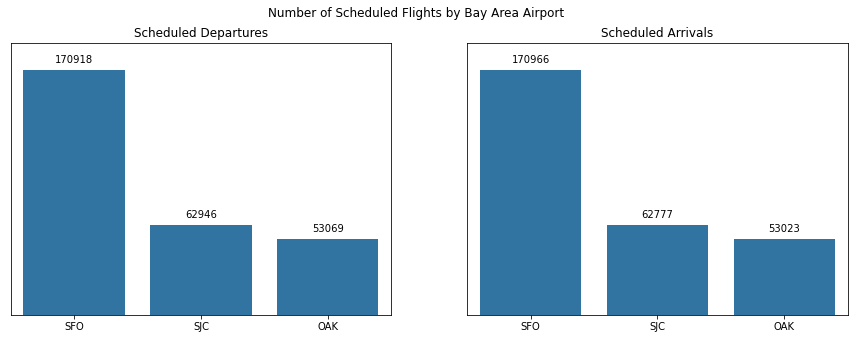

In [30]:
base_color = sb.color_palette()[0]
df_list = [departures, arrivals]
titles = ['Scheduled Departures', 'Scheduled Arrivals']
counts = [dep_bay_order, arr_bay_order]
plt.figure(figsize=[15, 5])
var_list = ['origin', 'dest']
for i in range(len(df_list)):
    plt.subplot(1, 2, i+1)
    sb.countplot(data=df_list[i], x=var_list[i], color=base_color)
    plt.title(titles[i])
    locs, labels = plt.xticks()
    for loc, label in zip(locs, labels):
        count = counts[i][label.get_text()]
        plt.text(loc, count+5000, count, ha='center')
    plt.xlabel('')
    plt.ylabel('')
    plt.yticks([])
    plt.ylim(0, 190000)
plt.suptitle('Number of Scheduled Flights by Bay Area Airport');

SFO partners with about double the amount of airports compared to SJC and OAK.

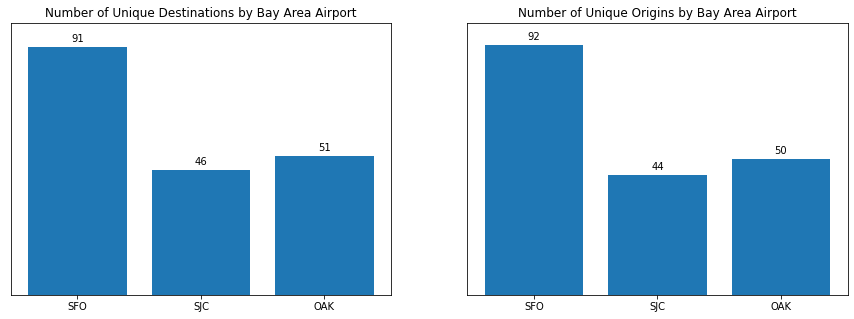

In [31]:
df_list = [departures, arrivals]
plt.figure(figsize=[15, 5])
var_list_1 = ['origin', 'dest']
var_list_2 = ['dest', 'origin']
titles = ['Number of Unique Destinations by Bay Area Airport', 'Number of Unique Origins by Bay Area Airport']
for i in range(len(df_list)):
    bay_partners = df_list[i].groupby(var_list_1[i])[var_list_2[i]].nunique()
    plt.subplot(1, 2, i+1)
    plt.bar(bay_partners.index.values, bay_partners, tick_label=bay_partners.index.values)
    plt.title(titles[i])
    locs, labels = plt.xticks()
    for loc, label in zip(locs, labels):
        count = bay_partners[label.get_text()]
        plt.text(loc, count+2, count, ha='center');
    plt.ylabel('')
    plt.yticks([])
    plt.ylim(0, 100);

Flights to and from SFO also travel a wider range of distances, with a higher proportion of planes flying longer distances. SJC and OAK cover similar ranges of distances, but SJC is more evenly spread along that range.

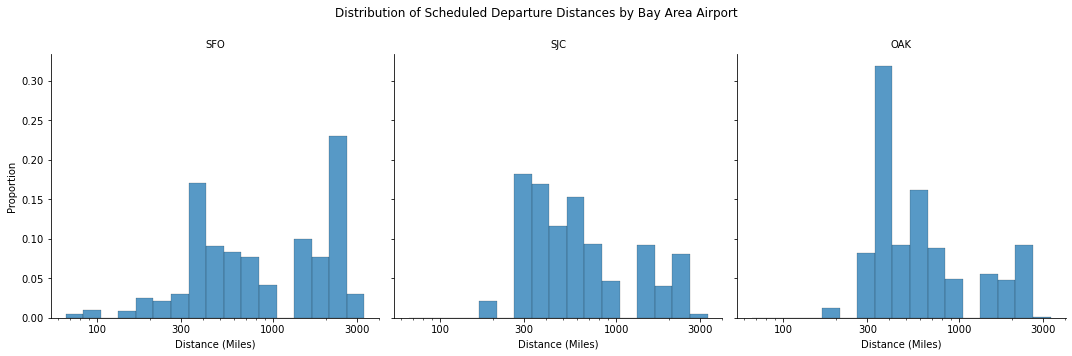

In [32]:
log_binsize = 0.1
tick_locs = [100, 300, 1000, 3000]
bins = log_bins(departures, 'distance', log_binsize)
g = sb.displot(data=departures, x='distance', col='origin', bins=bins, stat='probability', common_norm=False)
plt.xscale('log')
plt.xticks(tick_locs, tick_locs)
g.set_titles('{col_name}')
g.set_axis_labels('Distance (Miles)', 'Proportion')
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Distribution of Scheduled Departure Distances by Bay Area Airport');

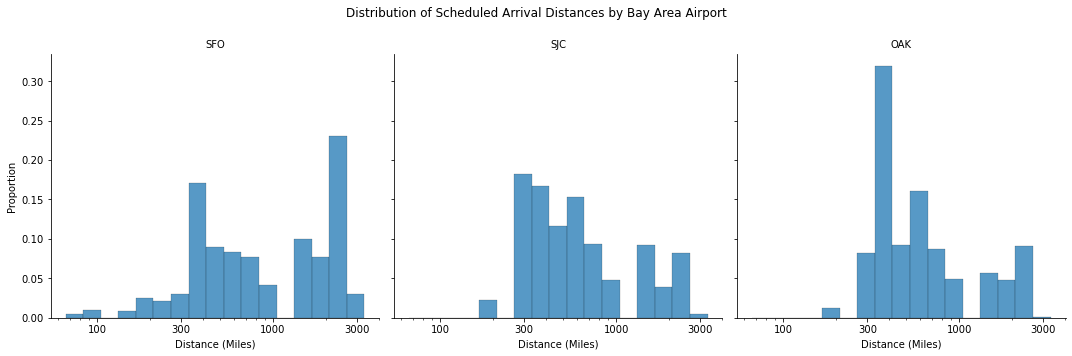

In [33]:
log_binsize = 0.1
tick_locs = [100, 300, 1000, 3000]
bins = log_bins(arrivals, 'distance', log_binsize)
g = sb.displot(data=arrivals, x='distance', col='dest', bins=bins, stat='probability', common_norm=False)
plt.xscale('log')
plt.xticks(tick_locs, tick_locs)
g.set_titles('{col_name}')
g.set_axis_labels('Distance (Miles)', 'Proportion')
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Distribution of Scheduled Arrival Distances by Bay Area Airport');

Flights to and from SFO are more volatile in terms of arrival delay, as there is a high number of planes that arrive early, but also a high number that arrive late. Between SJC and OAK, SJC has better on-time performance because a higher proportion of flights arrive early and a lower proportion arrive late.

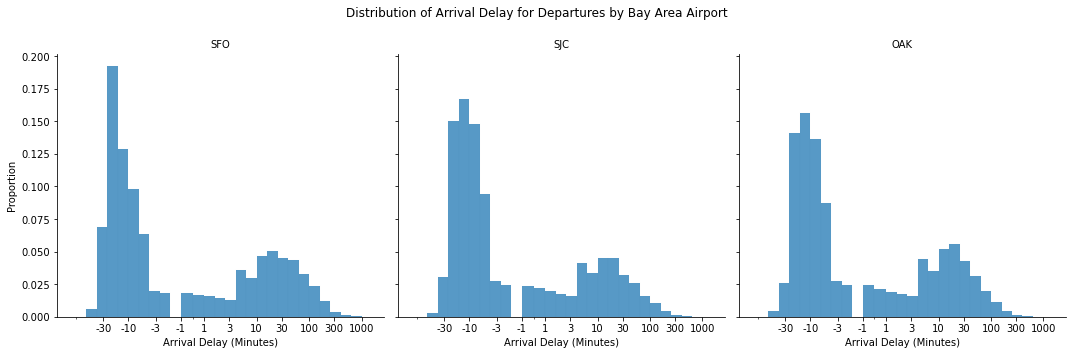

In [34]:
log_binsize = 0.2
tick_locs = [-30, -10, -3, -1, 1, 3, 10, 30, 100, 300, 1000]
bins = symlog_bins(departures, 'arr_delay', log_binsize)
g = sb.displot(data=departures, x='arr_delay', col='origin', bins=bins, stat='probability', common_norm=False)
plt.xscale('symlog', linthresh=1, linscale=log_binsize)
plt.xticks(tick_locs, tick_locs)
g.set_titles('{col_name}')
g.set_axis_labels('Arrival Delay (Minutes)', 'Proportion')
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Distribution of Arrival Delay for Departures by Bay Area Airport');

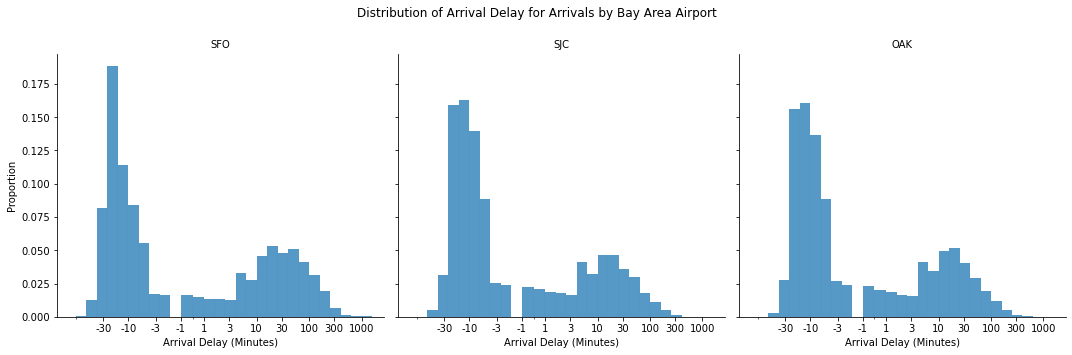

In [35]:
log_binsize = 0.2
tick_locs = [-30, -10, -3, -1, 1, 3, 10, 30, 100, 300, 1000]
bins = symlog_bins(arrivals, 'arr_delay', log_binsize)
g = sb.displot(data=arrivals, x='arr_delay', col='dest', bins=bins, stat='probability', common_norm=False)
plt.xscale('symlog', linthresh=1, linscale=log_binsize)
plt.xticks(tick_locs, tick_locs)
g.set_titles('{col_name}')
g.set_axis_labels('Arrival Delay (Minutes)', 'Proportion')
plt.subplots_adjust(top=0.85)
g.fig.suptitle('Distribution of Arrival Delay for Arrivals by Bay Area Airport');

Although all three airports have roughly equal proportions of cancellations, SJC and OAK cancellations are predominantly due to carriers, whereas there are more due to weather and the National Aviation System (NAS) at SFO. This means that SJC and OAK cancellations could potentially be avoided depending on what carrier is chosen, whereas those at SFO are less controllable.

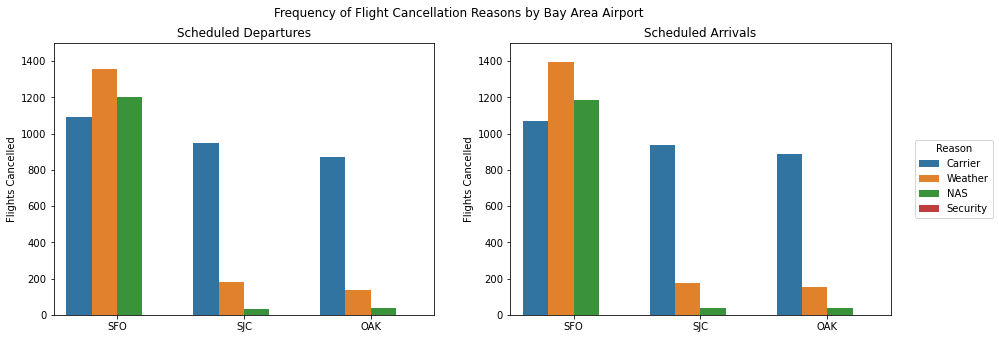

In [36]:
df_list = [departures, arrivals]
plt.figure(figsize=[15, 5])
titles = ['Scheduled Departures', 'Scheduled Arrivals']
var_list = ['origin', 'dest']
for i in range(len(df_list)):
    plt.subplot(1, 2, i+1)
    sb.countplot(data=df_list[i], x=var_list[i], hue='cancellation_code')
    plt.title(titles[i])
    plt.xlabel('')
    plt.ylabel('Flights Cancelled')
    plt.ylim(0, 1500)
    if i == len(df_list)-1:
        plt.legend(['Carrier', 'Weather', 'NAS', 'Security'], title='Reason', bbox_to_anchor=[1.05, 0.5], loc=6)
    else:
        plt.legend('', frameon=False)
plt.suptitle('Frequency of Flight Cancellation Reasons by Bay Area Airport');

## What time should you fly?

The average scheduled flights per day rises through the spring and summer months, with the peak being in August.

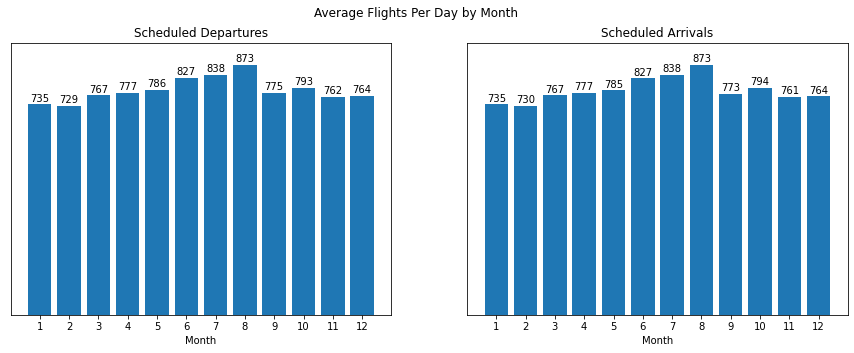

In [37]:
df_list = [departures, arrivals]
plt.figure(figsize=[15, 5])
titles = ['Scheduled Departures', 'Scheduled Arrivals']
tick_locs = np.arange(12)+1
for i in range(len(df_list)):
    plt.subplot(1, 2, i+1)
    # find flights per day by dividing counts for each month by unique dates for each month
    flights_per_day = df_list[i].groupby('month').size()/df_list[i].groupby('month')['date'].nunique()
    plt.bar(flights_per_day.index.values, flights_per_day, tick_label=flights_per_day.index.values)
    plt.title(titles[i])
    locs, labels = plt.xticks()
    for loc, label in zip(locs, labels):
        avg = flights_per_day[int(label.get_text())]
        avg_string = '{:0.0f}'.format(avg)
        plt.text(loc, avg+10, avg_string, ha='center')
    plt.xticks(tick_locs, tick_locs)
    plt.xlabel('Month')
    plt.ylabel('')
    plt.yticks([])
    plt.ylim(0, 950)
plt.suptitle('Average Flights Per Day by Month');

There are more scheduled flights during the weekdays than during the weekends, with the most notable drop on Saturdays.

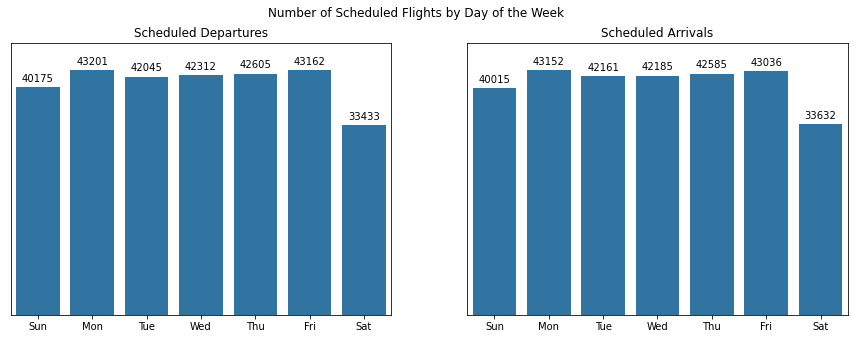

In [38]:
base_color = sb.color_palette()[0]
df_list = [departures, arrivals]
plt.figure(figsize=[15, 5])
titles = ['Scheduled Departures', 'Scheduled Arrivals']
for i in range(len(df_list)):
    plt.subplot(1, 2, i+1)
    sb.countplot(data=df_list[i], x='day_of_week', color=base_color)
    plt.title(titles[i])
    day_count = df_list[i]['day_of_week'].value_counts()
    locs, labels = plt.xticks()
    for loc, label in zip(locs, labels):
        count = day_count[label.get_text()]
        plt.text(loc, count+1000, count, ha='center')
    plt.xlabel('')
    plt.ylabel('')
    plt.yticks([])
    plt.ylim(0, 48000)
plt.suptitle('Number of Scheduled Flights by Day of the Week');

The number of scheduled departures is greatest during the morning at 8:00 AM and then gradually decreases as the day continues. The number of scheduled arrivals is high in the morning, especially at 9:00 AM, and then gradually decreases until the late afternoon, at which point it rises again into the late evening and hits another peak at 9:00 PM. For both departures and arrivals, there are few flights scheduled in the early hours of the morning.

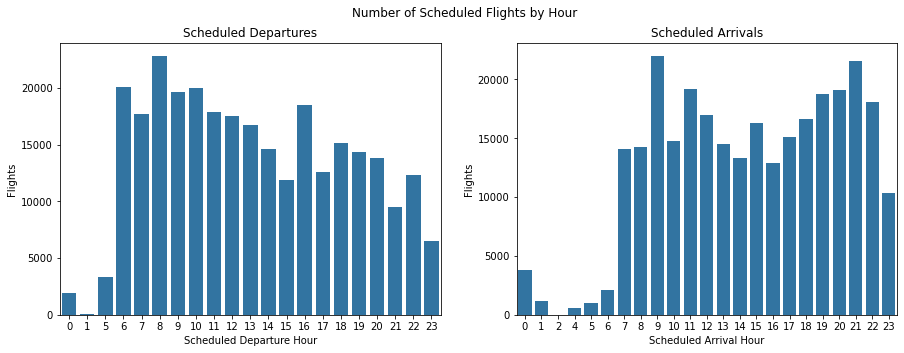

In [39]:
base_color = sb.color_palette()[0]
df_list = [departures, arrivals]
plt.figure(figsize=[15, 5])
titles = ['Scheduled Departures', 'Scheduled Arrivals']
var_list = ['crs_dep_hour', 'crs_arr_hour']
label_list = ['Scheduled Departure Hour', 'Scheduled Arrival Hour']
for i in range(len(df_list)):
    plt.subplot(1, 2, i+1)
    sb.countplot(data=df_list[i], x=var_list[i], color=base_color)
    plt.title(titles[i])
    plt.xlabel(label_list[i])
    plt.ylabel('Flights')
plt.suptitle('Number of Scheduled Flights by Hour');

Weather and NAS cause a larger proportion of cancellations during the winter months, while carrier cancellations are higher during the summer months. This means that cancellations during the summer can be avoided depending on what carrier is chosen, while cancellations in the winter are less controllable.

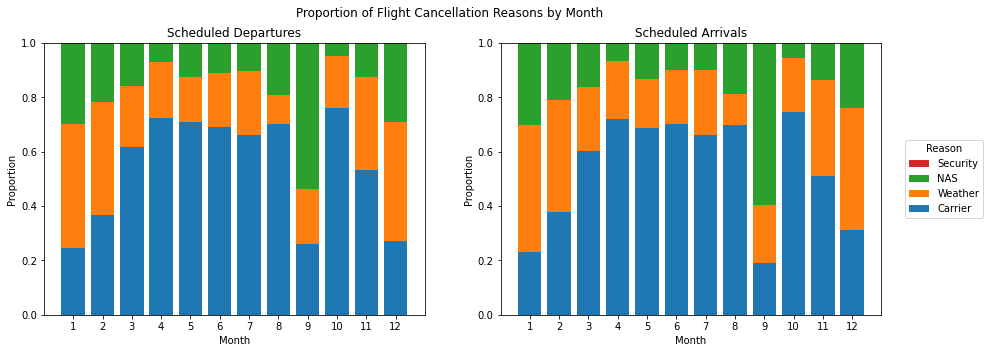

In [40]:
df_list = [departures, arrivals]
plt.figure(figsize=[15, 5])
titles = ['Scheduled Departures', 'Scheduled Arrivals']
month_order = np.arange(12)+1
code_order = ['A', 'B', 'C', 'D']
code_labels = ['Carrier', 'Weather', 'NAS', 'Security']
for i in range(len(df_list)):
    plt.subplot(1, 2, i+1)
    # list to be used for the legend
    artists = []
    baselines = np.zeros(len(month_order))
    month_counts = df_list[i][df_list[i]['cancellation_code'].notnull()]['month'].value_counts()
    # create stacked bar chart by adding each cancellation code proportion one by one
    for j in range(len(code_order)):
        code = code_order[j]
        month_code_counts = df_list[i].query('cancellation_code == @code')['month'].value_counts()
        month_code_props = month_code_counts/month_counts
        bars = plt.bar(x=np.arange(len(month_order)), height=month_code_props[month_order], bottom=baselines)
        artists.append(bars)
        baselines += month_code_props[month_order]
    plt.xticks(np.arange(len(month_order)), month_order)
    if i == len(df_list)-1:
        plt.legend(reversed(artists), reversed(code_labels), title='Reason', bbox_to_anchor=[1.05, 0.5], loc=6)
    else:
        plt.legend('', frameon=False)
    plt.title(titles[i])
    plt.xlabel('Month')
    plt.ylabel('Proportion')
plt.suptitle('Proportion of Flight Cancellation Reasons by Month');

For departures, 5:00 AM and 6:00 seem to be the best departure hours, as the mean and standard deviation are both low. For arrivals, 7:00 AM seems to be the best arrival hour for the same reasons. For both departures and arrivals, the means and standard deviations gradually rise throughout the day, only decreasing slightly at the end of the day. The means and standard deviations are also higher in the early hours of the morning, when there are few flights.

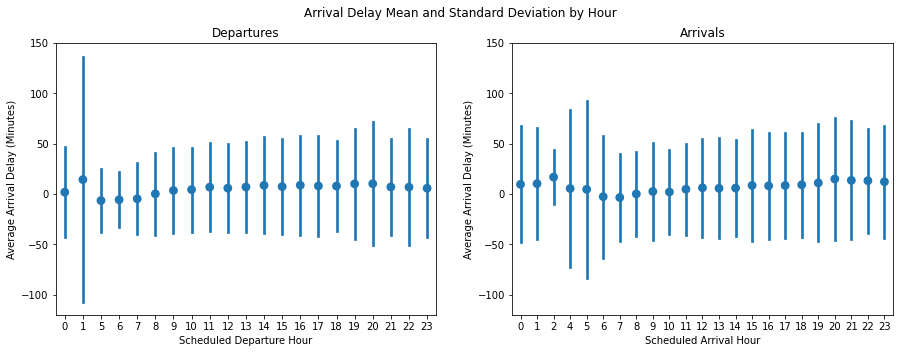

In [41]:
base_color = sb.color_palette()[0]
df_list = [departures, arrivals]
plt.figure(figsize=[15, 5])
titles = ['Departures', 'Arrivals']
var_list = ['crs_dep_hour', 'crs_arr_hour']
label_list = ['Scheduled Departure Hour', 'Scheduled Arrival Hour']
for i in range(len(df_list)):
    plt.subplot(1, 2, i+1)
    sb.pointplot(data=df_list[i], x=var_list[i], y='arr_delay', ci='sd', linestyles='', color=base_color)
    plt.title(titles[i])
    plt.xlabel(label_list[i])
    plt.ylabel('Average Arrival Delay (Minutes)')
    plt.ylim(-120, 150)
plt.suptitle('Arrival Delay Mean and Standard Deviation by Hour');

However, the average arrival delay by hour also varies between Bay Area airports. SFO becomes busier more quickly, as it reaches a positive average delay at 8:00 AM. On the other hand, SJC and OAK only reach positive average delays around noon for departures, and at 3:00 PM for arrivals.

It should also be noted that flights to and from SFO have the widest range of flying hours, while SJC has the most limited hours.

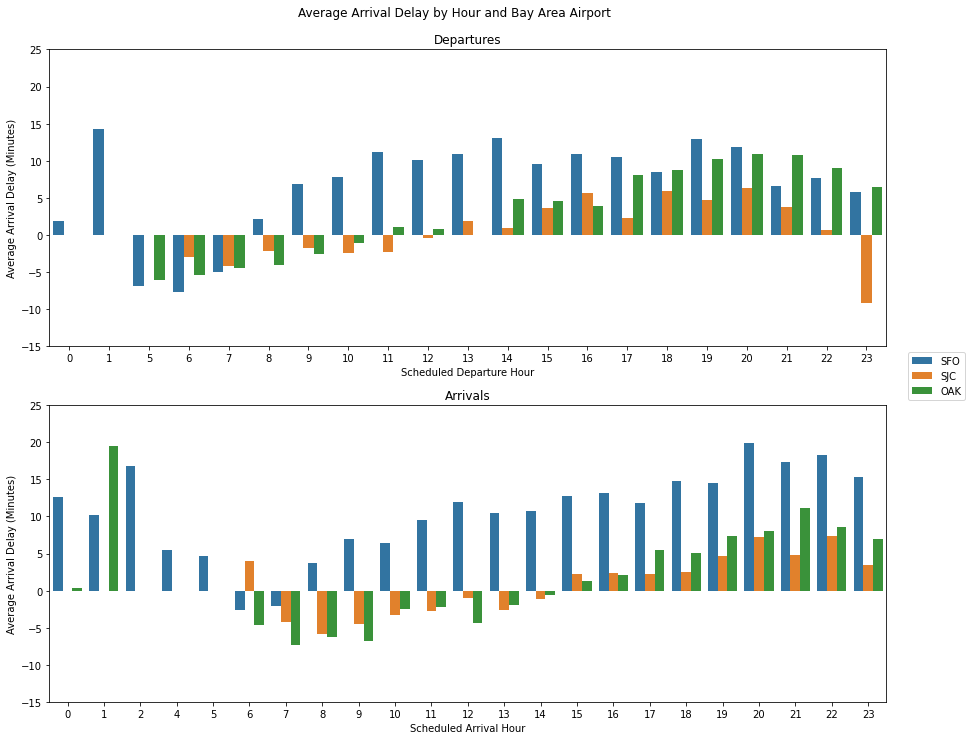

In [42]:
df_list = [departures, arrivals]
plt.figure(figsize=[15, 12])
titles = ['Departures', 'Arrivals']
var_list_1 = ['crs_dep_hour', 'crs_arr_hour']
var_list_2 = ['origin', 'dest']
label_list = ['Scheduled Departure Hour', 'Scheduled Arrival Hour']
for i in range(len(df_list)):
    plt.subplot(2, 1, i+1)
    sb.barplot(data=df_list[i], x=var_list_1[i], y='arr_delay', hue=var_list_2[i], errwidth=0)
    plt.title(titles[i])
    plt.xlabel(label_list[i])
    plt.ylabel('Average Arrival Delay (Minutes)')
    plt.ylim(-15, 25)
    if i == len(df_list)-1:
        plt.legend(title=None, bbox_to_anchor=[1.02, 1.1], loc=6)
    else:
        plt.legend('', frameon=False)
plt.suptitle('Average Arrival Delay by Hour and Bay Area Airport', y=0.93);

## Which carrier should you choose?



Major carriers offer more flights compared to smaller regional airlines. Southwest also has a large margin over the rest of the carriers, as its flight count is almost double the amount of the third-ranked airline, Skywest.

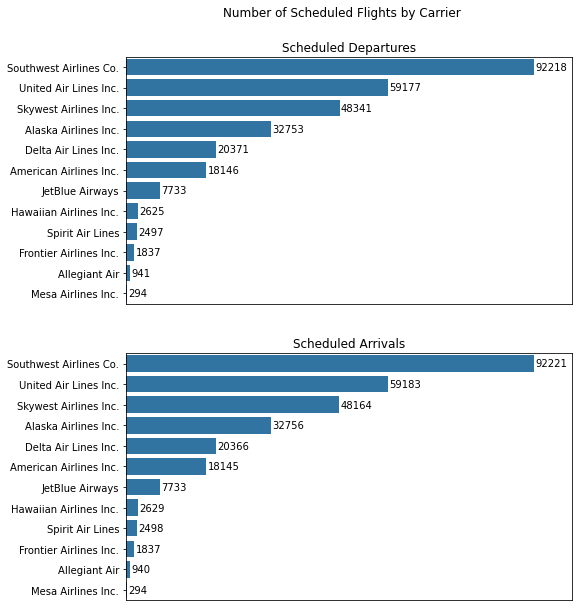

In [43]:
base_color = sb.color_palette()[0]
df_list = [departures, arrivals]
plt.figure(figsize=[8, 10])
titles = ['Scheduled Departures', 'Scheduled Arrivals']
counts = [dep_carrier_order, arr_carrier_order]
for i in range(len(df_list)):
    plt.subplot(2, 1, i+1)
    sb.countplot(data=df_list[i], y='carrier_name', color=base_color)
    plt.title(titles[i])
    locs, labels = plt.yticks()
    for loc, label in zip(locs, labels):
        count = counts[i][label.get_text()]
        plt.text(count+300, loc, count, va='center')
    plt.ylabel('')
    plt.xlabel('')
    plt.xticks([])
    plt.xlim(0, 101000)
plt.suptitle('Number of Scheduled Flights by Carrier', y=0.95);

Larger carriers travel to and from more unique locations, with United and Skywest having noticeably higher amounts of locations.

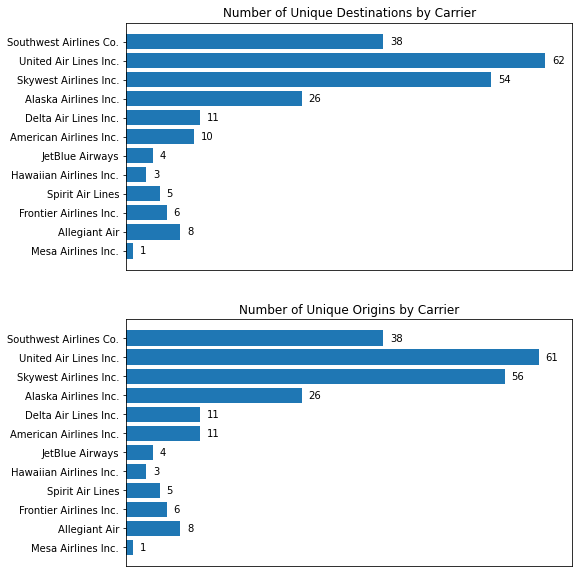

In [44]:
df_list = [departures, arrivals]
plt.figure(figsize=[8, 10])
titles = ['Number of Unique Destinations by Carrier', 'Number of Unique Origins by Carrier']
var_list = ['dest', 'origin']
for i in range(len(df_list)):
    carriers_partners = df_list[i].groupby('carrier_name')[var_list[i]].nunique()
    plt.subplot(2, 1, i+1)
    plt.barh(carriers_partners.index.values, carriers_partners, tick_label=carriers_partners.index.values)
    plt.gca().invert_yaxis()
    plt.title(titles[i])
    locs, labels = plt.yticks()
    for loc, label in zip(locs, labels):
        count = carriers_partners[label.get_text()]
        plt.text(count+1, loc, count, va='center')
    plt.xlabel('')
    plt.xticks([])
    plt.xlim(0, 66);

Most of the airlines fly predominantly to and from SFO, followed by SJC and then OAK. The most notable exception is Southwest, which uses OAK and SJC more than SFO.

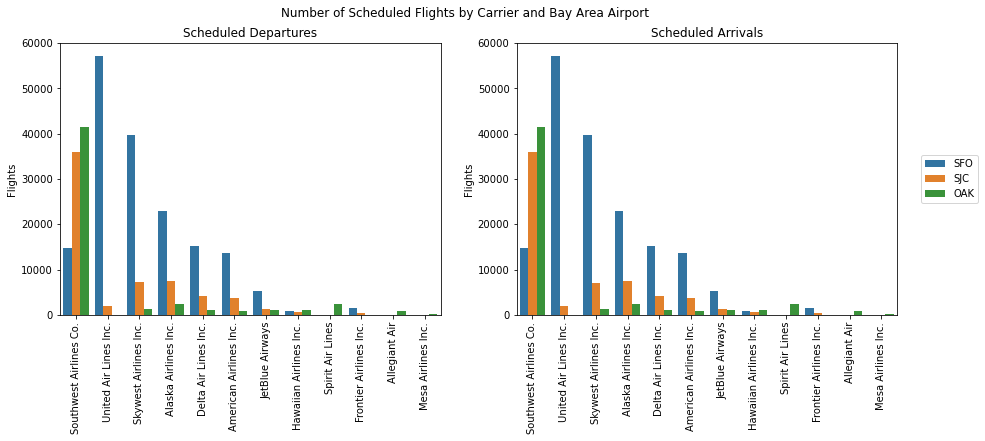

In [45]:
df_list = [departures, arrivals]
plt.figure(figsize=[15, 5])
titles = ['Scheduled Departures', 'Scheduled Arrivals']
var_list = ['origin', 'dest']
for i in range(len(df_list)):
    plt.subplot(1, 2, i+1)
    sb.countplot(data=df_list[i], x='carrier_name', hue=var_list[i])
    plt.title(titles[i])
    plt.xlabel('')
    plt.xticks(rotation=90)
    plt.ylabel('Flights')
    if i == len(df_list)-1:
        plt.legend(title=None, bbox_to_anchor=[1.05, 0.5], loc=6)
    else:
        plt.legend('', frameon=False)
plt.suptitle('Number of Scheduled Flights by Carrier and Bay Area Airport');

Larger airlines travel a wider range of distances, while smaller airlines only travel certain distances, presumably because they focus only on a smaller number of hubs. Among the three airlines that have the widest distributions -- Southwest, United, and Skywest -- Southwest and Skywest seem to focus on closer locations, while United has a larger peak at longer distances.

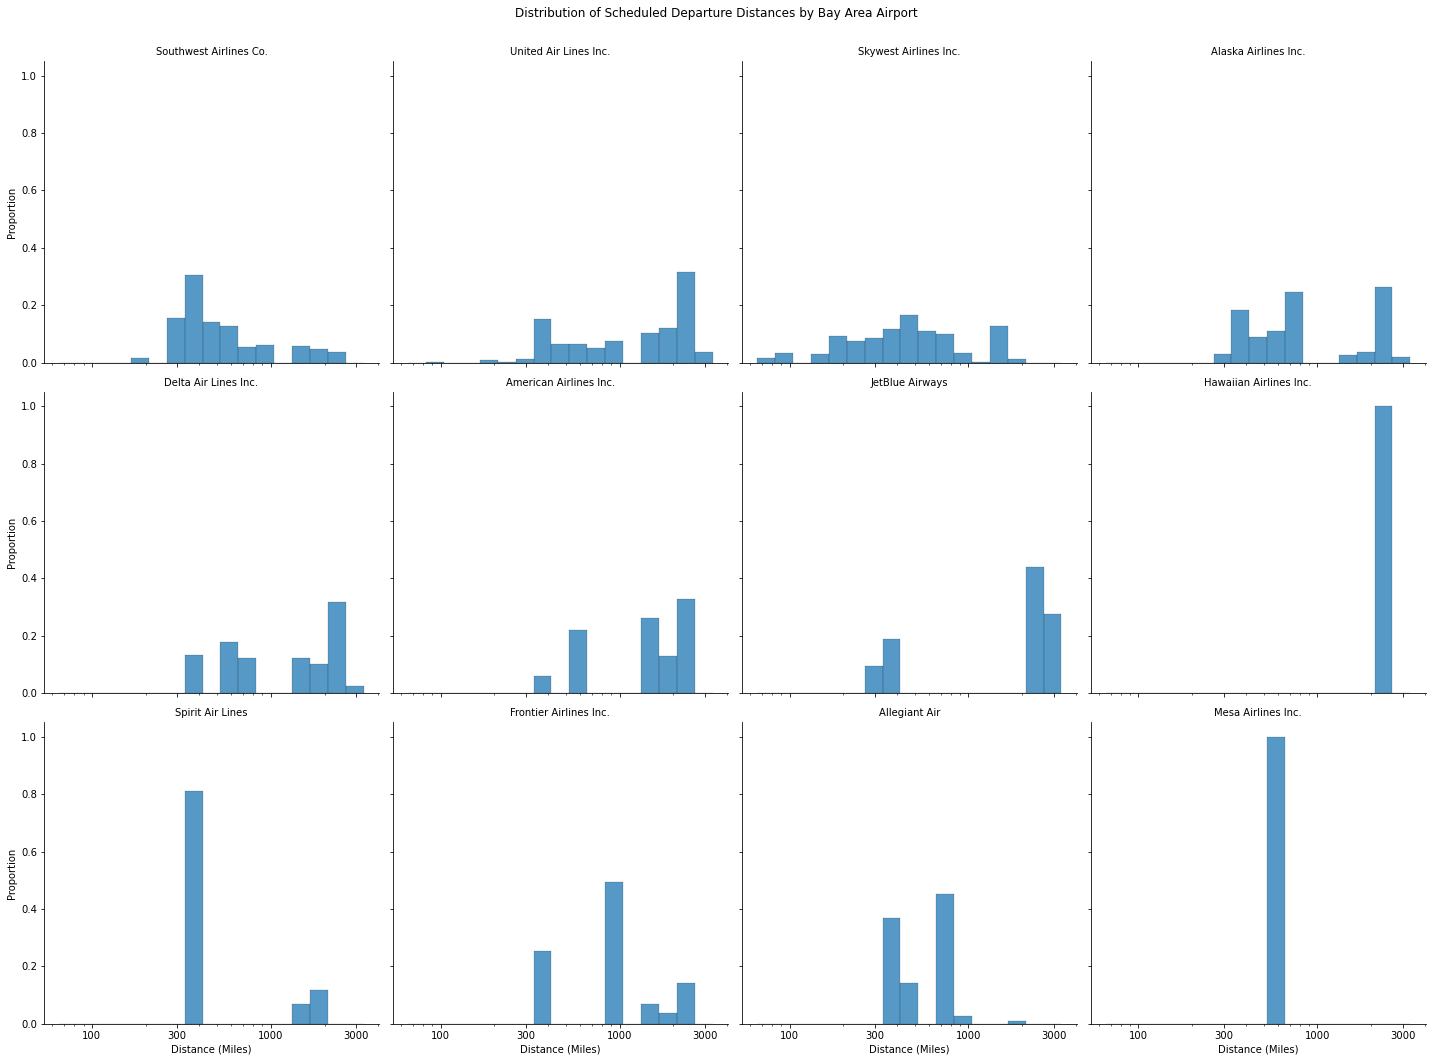

In [46]:
log_binsize = 0.1
tick_locs = [100, 300, 1000, 3000]
bins = log_bins(departures, 'distance', log_binsize)
g = sb.displot(data=departures, x='distance', col='carrier_name', col_wrap=4, bins=bins, stat='probability', common_norm=False)
plt.xscale('log')
plt.xticks(tick_locs, tick_locs)
g.set_titles('{col_name}')
g.set_axis_labels('Distance (Miles)', 'Proportion')
plt.subplots_adjust(top=0.93)
g.fig.suptitle('Distribution of Scheduled Departure Distances by Bay Area Airport');

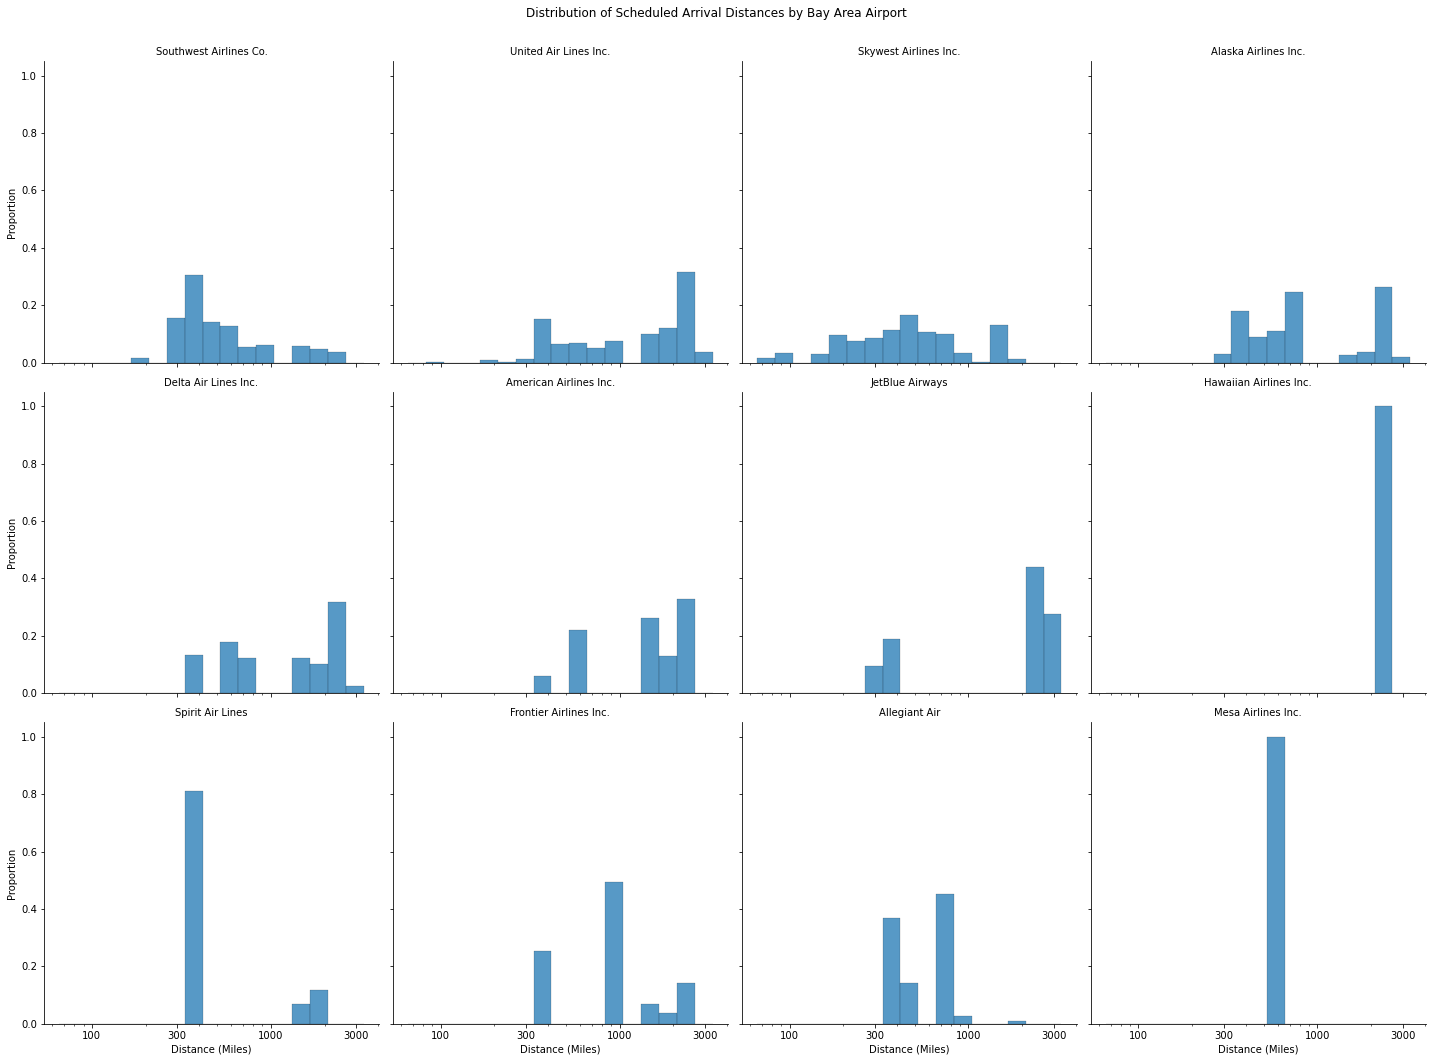

In [47]:
log_binsize = 0.1
tick_locs = [100, 300, 1000, 3000]
bins = log_bins(arrivals, 'distance', log_binsize)
g = sb.displot(data=arrivals, x='distance', col='carrier_name', col_wrap=4, bins=bins, stat='probability', common_norm=False)
plt.xscale('log')
plt.xticks(tick_locs, tick_locs)
g.set_titles('{col_name}')
g.set_axis_labels('Distance (Miles)', 'Proportion')
plt.subplots_adjust(top=0.93)
g.fig.suptitle('Distribution of Scheduled Arrival Distances by Bay Area Airport');

Many of the smaller regional airlines tend to have worse performance when looking at arrival delays.

For departures, Delta has better performance as it has a high proportion on the left side of the distribution of arrival delay. Hawaiian, Frontier, and Mesa have worse performance because they have higher proportions on the right side of the distribution compared to other airlines.

For arrivals, Skywest and Delta stand out as having better performance. American, Hawaiian, Frontier, Allegiant and Mesa all have worse performance. Hawaiian's performance for arrivals is particularly poor given that the higher peak is on the right side of the distribution.

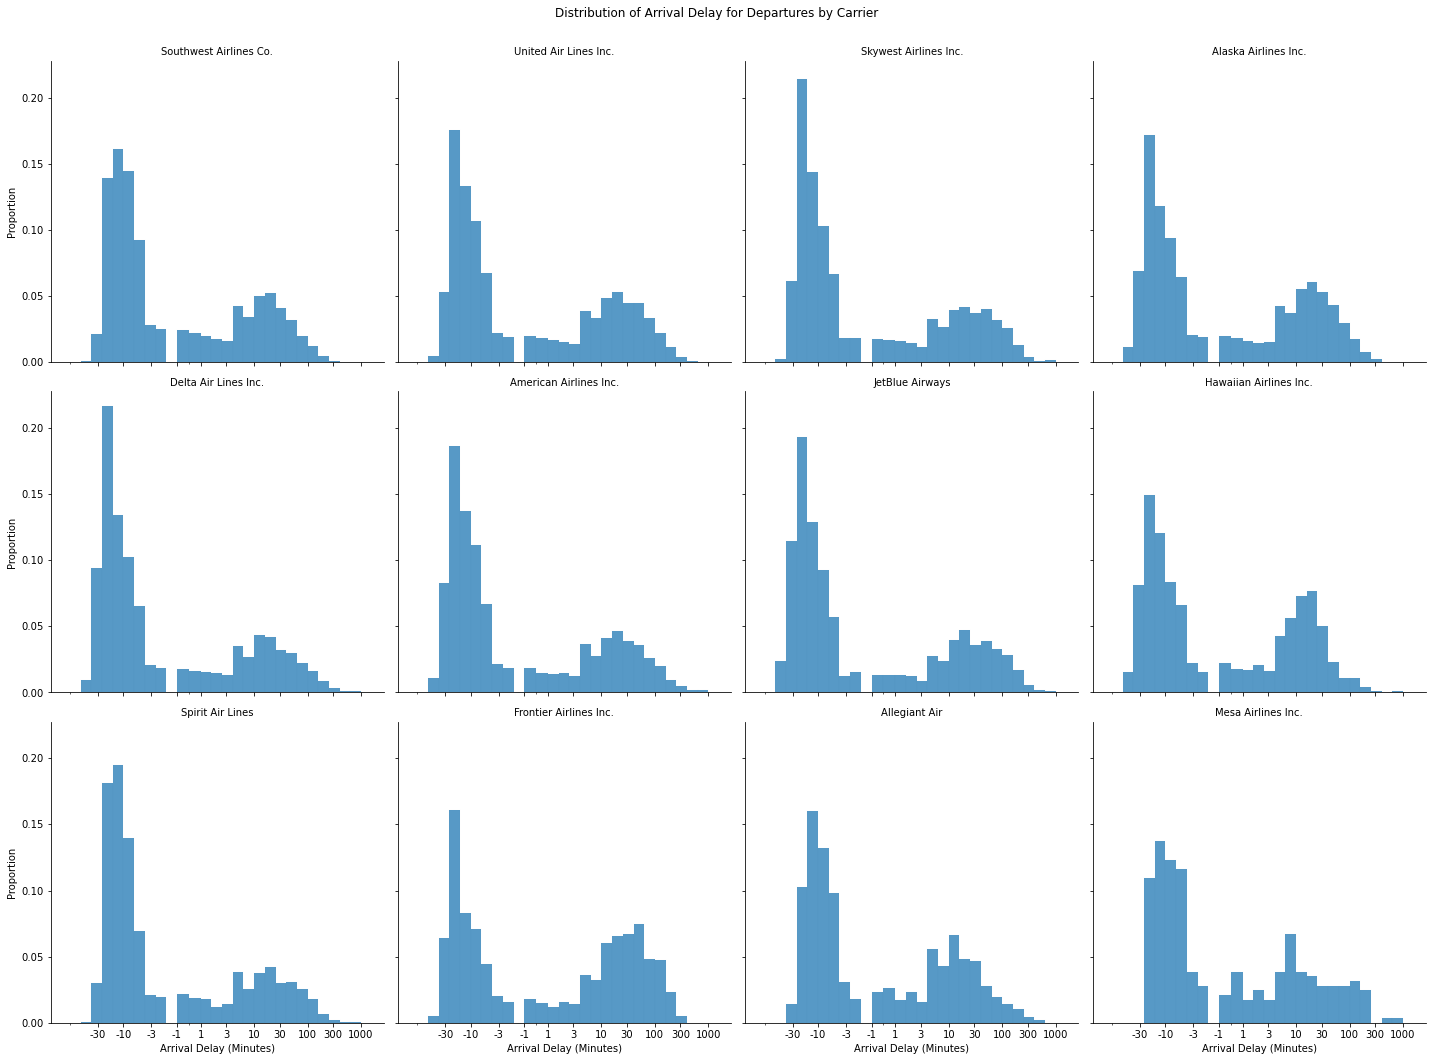

In [48]:
log_binsize = 0.2
tick_locs = [-30, -10, -3, -1, 1, 3, 10, 30, 100, 300, 1000]
bins = symlog_bins(departures, 'arr_delay', log_binsize)
g = sb.displot(data=departures, x='arr_delay', col='carrier_name', col_wrap=4, bins=bins, stat='probability', common_norm=False)
plt.xscale('symlog', linthresh=1, linscale=log_binsize)
plt.xticks(tick_locs, tick_locs)
g.set_titles('{col_name}')
g.set_axis_labels('Arrival Delay (Minutes)', 'Proportion')
plt.subplots_adjust(top=0.93)
g.fig.suptitle('Distribution of Arrival Delay for Departures by Carrier');

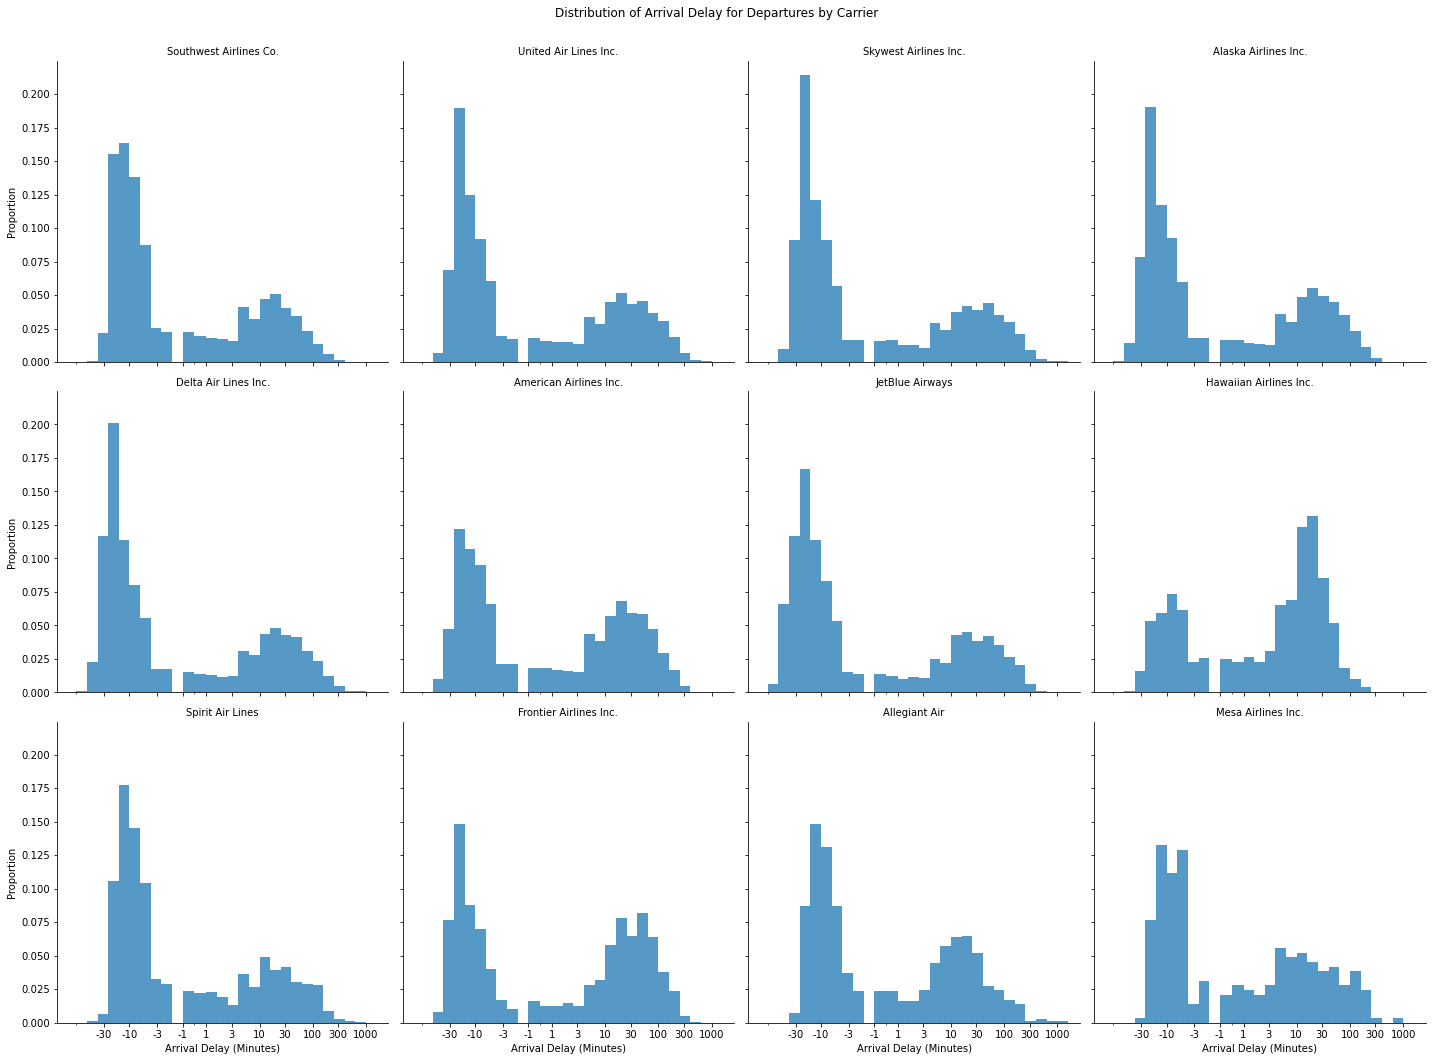

In [49]:
log_binsize = 0.2
tick_locs = [-30, -10, -3, -1, 1, 3, 10, 30, 100, 300, 1000]
bins = symlog_bins(arrivals, 'arr_delay', log_binsize)
g = sb.displot(data=arrivals, x='arr_delay', col='carrier_name', col_wrap=4, bins=bins, stat='probability', common_norm=False)
plt.xscale('symlog', linthresh=1, linscale=log_binsize)
plt.xticks(tick_locs, tick_locs)
g.set_titles('{col_name}')
g.set_axis_labels('Arrival Delay (Minutes)', 'Proportion')
plt.subplots_adjust(top=0.93)
g.fig.suptitle('Distribution of Arrival Delay for Departures by Carrier');

Southwest, Skywest, and Mesa have the highest cancellation rates among all carriers. United, Delta, JetBlue, Hawaiian, and Allegiant all have lower cancellation rates, with Delta being especially low.

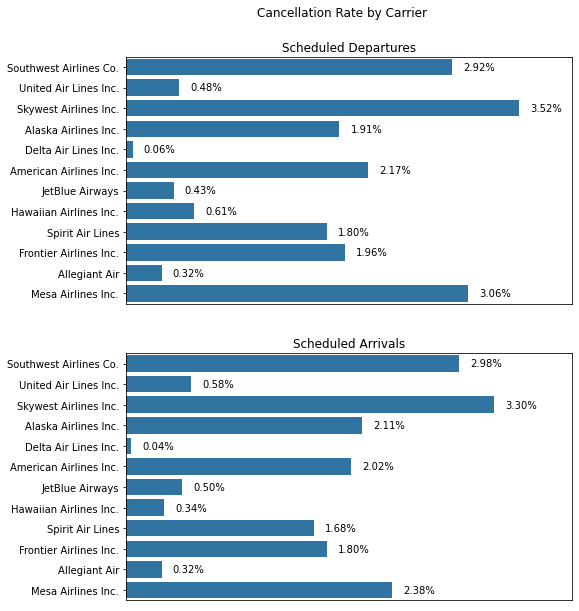

In [50]:
base_color = sb.color_palette()[0]
df_list = [departures, arrivals]
plt.figure(figsize=[8, 10])
titles = ['Scheduled Departures', 'Scheduled Arrivals']
for i in range(len(df_list)):
    plt.subplot(2, 1, i+1)
    sb.barplot(data=df_list[i], y='carrier_name', x='cancelled', errwidth=0, color=base_color)
    plt.title(titles[i])
    locs, labels = plt.yticks()
    carrier_cancellations = df_list[i].groupby('carrier_name')['cancelled'].mean()
    for loc, label in zip(locs, labels):
        rate = carrier_cancellations[label.get_text()]
        rate_string = '{:0.2f}%'.format(rate*100)
        plt.text(rate+0.001, loc, rate_string, va='center')
    plt.ylabel('')
    plt.xlabel('')
    plt.xticks([])
    plt.xlim(0, 0.04)
plt.suptitle('Cancellation Rate by Carrier', y=0.95);

## Which location outside of the Bay Area should you fly to or from?



A large number of flights travel along the west coast, especially in southern California and the Pacific Northwest. Outside of the west coast, there are also many flights to and from the northeast US.

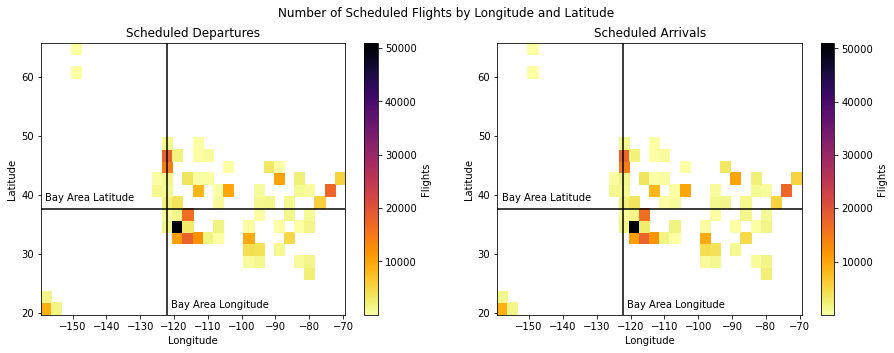

In [51]:
bay_long = -122.1756
bay_lat = 37.5661
x_binsize = 3
y_binsize = 2
df_list = [departures, arrivals]
plt.figure(figsize=[15, 5])
titles = ['Scheduled Departures', 'Scheduled Arrivals']
xvar_list = ['dest_long', 'origin_long']
yvar_list = ['dest_lat', 'origin_lat']
for i in range(len(df_list)):
    bins_x = linear_bins(df_list[i], xvar_list[i], x_binsize)
    bins_y = linear_bins(df_list[i], yvar_list[i], y_binsize)
    plt.subplot(1, 2, i+1)
    plt.hist2d(data=df_list[i], x=xvar_list[i], y=yvar_list[i], bins=[bins_x, bins_y], cmin=0.5, cmap='inferno_r')
    plt.colorbar(label='Flights')
    plt.title(titles[i])
    plt.axvline(x=bay_long, color='k')
    plt.text(-121, 21, 'Bay Area Longitude')
    plt.text(-158, 39, 'Bay Area Latitude')
    plt.axhline(y=bay_lat, color='k')
    plt.xlabel('Longitude')
    plt.ylabel('Latitude')
plt.suptitle('Number of Scheduled Flights by Longitude and Latitude');

Out of the top 20 destinations and origins by flight count, most are in the western US. Airports in the top 20 that are not in the western US are major hubs in large cities, such as New York, Chicago, Newark, Dallas-Fort Worth, Boston, and Atlanta.

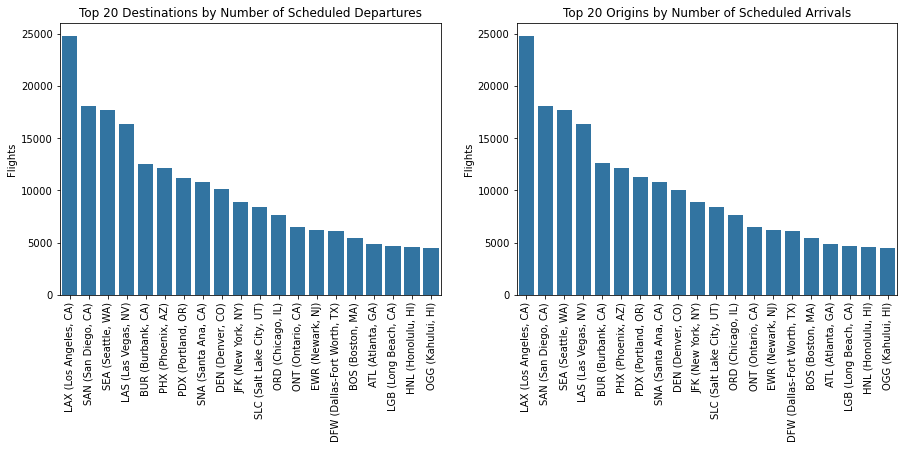

In [52]:
base_color = sb.color_palette()[0]
df_top_list = [departures_top, arrivals_top]
plt.figure(figsize=[15, 5])
titles = ['Top 20 Destinations by Number of Scheduled Departures', 'Top 20 Origins by Number of Scheduled Arrivals']
var_list = ['dest_name', 'origin_name']
for i in range(len(df_list)):
    plt.subplot(1, 2, i+1)
    sb.countplot(data=df_top_list[i], x=var_list[i], color=base_color)
    plt.title(titles[i])
    plt.xlabel('')
    plt.xticks(rotation=90)
    plt.ylabel('Flights');

Flights that are scheduled to travel shorter distances tend to have higher cancellation rates.

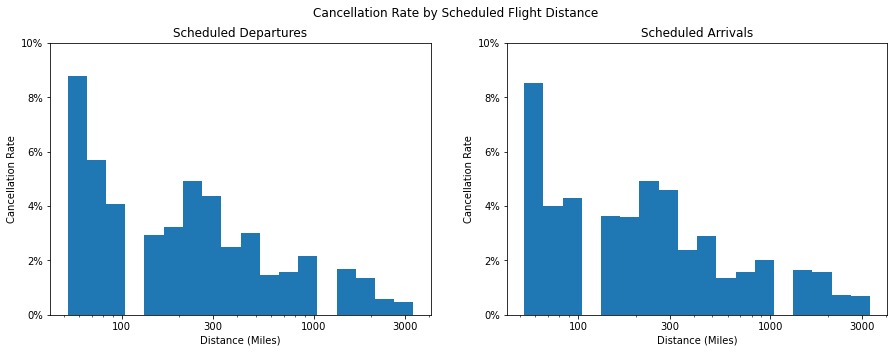

In [53]:
log_binsize = 0.1
xtick_locs = [100, 300, 1000, 3000]
ytick_locs = np.arange(0, 0.12, 0.02)
df_list = [departures, arrivals]
plt.figure(figsize=[15, 5])
titles = ['Scheduled Departures', 'Scheduled Arrivals']
for i in range(len(df_list)):
    bins = 10**np.arange(np.log10(df_list[i]['distance'].min())-log_binsize, np.log10(df_list[i]['distance'].max())+log_binsize, log_binsize)
    bin_idxs = pd.cut(df_list[i]['distance'], bins, right=False, include_lowest=True, labels=False).astype(int)
    pts_per_bin = df_list[i].groupby(bin_idxs).size()
    cancelled_weights = df_list[i]['cancelled']/pts_per_bin[bin_idxs].values
    plt.subplot(1, 2, i+1)
    plt.hist(data=df_list[i], x='distance', bins=bins, weights=cancelled_weights)
    plt.xscale('log')
    plt.title(titles[i])
    plt.xticks(xtick_locs, xtick_locs)
    ytick_labels = ['{:0.0f}%'.format(v*100) for v in ytick_locs]
    plt.yticks(ytick_locs, ytick_labels)
    plt.ylim(0, 0.1)
    plt.xlabel('Distance (Miles)')
    plt.ylabel('Cancellation Rate')
plt.suptitle('Cancellation Rate by Scheduled Flight Distance');

Flights that are scheduled to travel longer distances tend to have higher diversion rates.

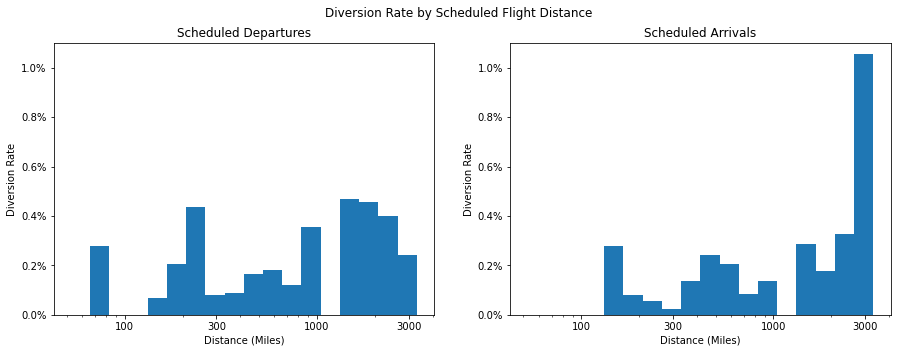

In [54]:
log_binsize = 0.1
xtick_locs = [100, 300, 1000, 3000]
ytick_locs = np.arange(0, 0.012, 0.002)
df_list = [departures, arrivals]
plt.figure(figsize=[15, 5])
titles = ['Scheduled Departures', 'Scheduled Arrivals']
for i in range(len(df_list)):
    bins = 10**np.arange(np.log10(df_list[i]['distance'].min())-log_binsize, np.log10(df_list[i]['distance'].max())+log_binsize, log_binsize)
    bin_idxs = pd.cut(df_list[i]['distance'], bins, right=False, include_lowest=True, labels=False).astype(int)
    pts_per_bin = df_list[i].groupby(bin_idxs).size()
    diverted_weights = df_list[i]['diverted']/pts_per_bin[bin_idxs].values
    plt.subplot(1, 2, i+1)
    plt.hist(data=df_list[i], x='distance', bins=bins, weights=diverted_weights)
    plt.xscale('log')
    plt.title(titles[i])
    plt.xticks(xtick_locs, xtick_locs)
    ytick_labels = ['{:0.1f}%'.format(v*100) for v in ytick_locs]
    plt.yticks(ytick_locs, ytick_labels)
    plt.ylim(0, 0.011)
    plt.xlabel('Distance (Miles)')
    plt.ylabel('Diversion Rate')
plt.suptitle('Diversion Rate by Scheduled Flight Distance');